In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import rasterio
from rasterio import CRS

In [2]:
#Use rasterio to georeference an image of your choosing (not geospatial) by using rasterio.from_origin 
#to create a transform, an epsg code to define your coordinate system (anything is fine, 4326 is WGS84), 
#and rasterio to write out the image. 
#Bring the image into ArcGIS Pro and include a screenshot of it overlaid on a map along with the assignment.

I = imageio.v3.imread(r"data (1)\data\dublin-skyline-ireland.png")

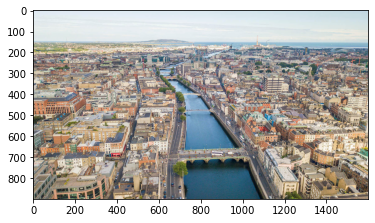

In [12]:
plt.imshow(I)

In [13]:
np.shape(I)

(900, 1600, 3)

In [19]:
meta = imageio.v3.immeta(r"data (1)\data\dublin-skyline-ireland.png")
print(meta)

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1), 'progressive': 1, 'progression': 1, 'mode': 'RGB', 'shape': (1600, 900)}


In [3]:
gt = rasterio.transform.from_origin(53.333116, -6.267922, .1, .1)

In [4]:
gt

Affine(0.1, 0.0, 53.333116,
       0.0, -0.1, -6.267922)

In [7]:
with rasterio.open(
    'dublin.tif',
    'w',
    driver='GTiff',
    height=I.shape[1],
    width=I.shape[2],
    count=1,
    dtype=I.dtype,
    crs=CRS.from_epsg(4326),
    tranform = gt) as dst:
    dst.write(I, 1)

C:\Users\azale\anaconda3\envs\algorithms\lib\site-packages\rasterio\__init__.py:287: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


ValueError: Source shape (1, 900, 1600, 3) is inconsistent with given indexes 1